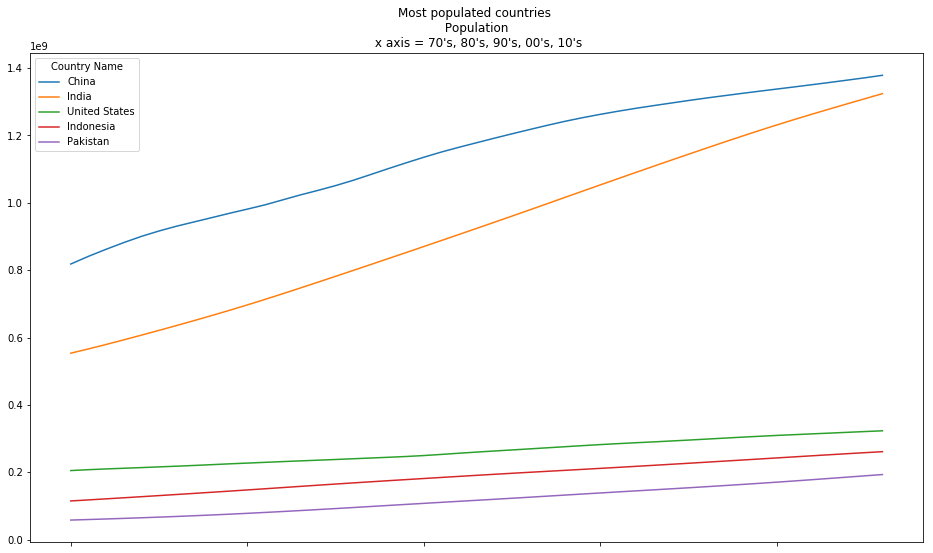

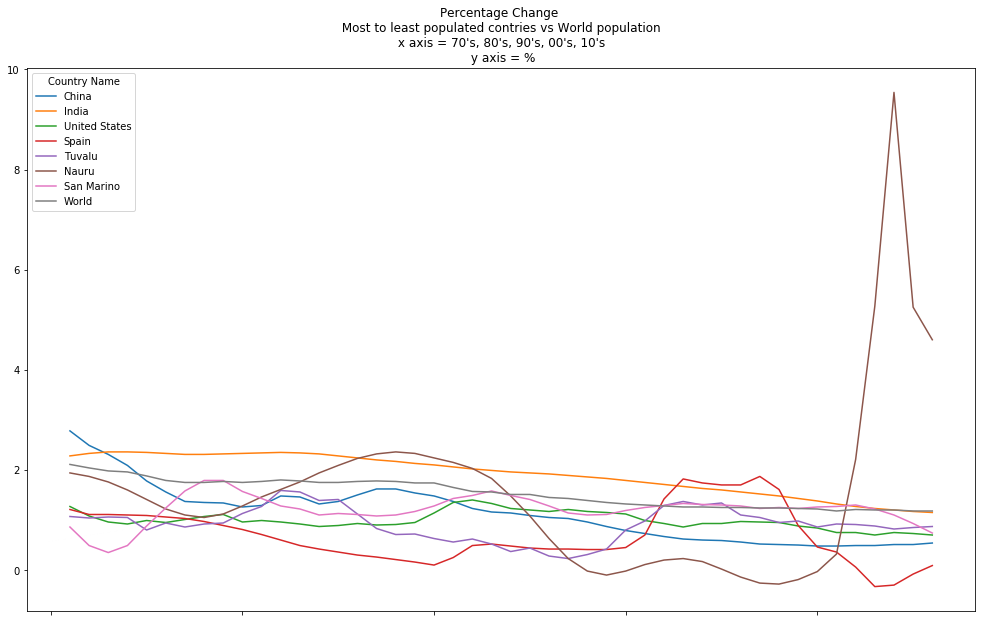

In [2]:
#Pipeline - World Population Percentage Change

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def acquire():
    demo = pd.read_csv('country_population.csv')
    return demo

def wrangle(df):
    dropyears = [str(x) for x in range(1960, 1970)]
    filtered = demo.drop(dropyears, axis=1)
    filtered = filtered.drop(['Indicator Name', 'Indicator Code', 'Country Code'], axis=1)
    droprows = [str(x) for x in range(1970, 2017)]
    filtered = filtered.dropna(subset = droprows, axis=0)
    filtered = filtered.T
    filtered.columns = filtered.iloc[0]
    filtered = filtered.drop('Country Name', axis=0)
    return filtered

def analyze_1(df):
    max_pob = filtered[['China', 'India', 'United States', 'Indonesia', 'Pakistan']].copy()
    return max_pob
    
def visualize_1(df):
    chart = max_pob.plot.line(legend=True, use_index=True, figsize=(16,9), title = "Most populated countries \n Population \n x axis = 70's, 80's, 90's, 00's, 10's")
    return chart
    
def analyze_2(df):
    pctchange = filtered.pct_change()*100
    pctchange = pctchange.round(2)
    pctchange = pctchange[['China', 'India', 'United States', 'Spain', 'Tuvalu', 'Nauru', 'San Marino', 'World']].copy()
    return pctchange

def visualize_2(df):
    chart_pct = pctchange.plot.line(legend=True, use_index=True, figsize=(17,10), title = "Percentage Change \n Most to least populated contries vs World population \n x axis = 70's, 80's, 90's, 00's, 10's \n y axis = %")
    return chart_pct

def save_viz_1(chart):
    fig = chart.get_figure()
    fig.savefig("Most populated countries" + ".png")

def save_viz_2(chart_pct):
    fig = chart_pct.get_figure()
    fig.savefig("Population Percentage Change" + ".png")
    
if __name__ == '__main__':
    demo = acquire()
    filtered = wrangle(demo)
    max_pob = analyze_1(filtered)
    chart = visualize_1(max_pob)
    save_viz_1(chart)
    pctchange = analyze_2(filtered)
    chart_pct = visualize_2(pctchange)
    save_viz_2(chart_pct)
    
